## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for plot creating the charts
- [pandas](https://python-graph-gallery.com/pandas/) is used to put the data into a dataframe and custom the table
- `numpy` is used to generate some data

In [1]:
import pandas as pd
import matplotlib as mpl

# data generation
import numpy as np

## Dataset

When creating **nice output tables**, we first need to have the dataframe with the values we want. 

In this post, we'll use *fake weather data* from different cities. We'll take a look at different simple features of [pandas](https://python-graph-gallery.com/pandas/)  to make this table more **aesthetically appealing**.

In [2]:
sample_size = 6

new_york = np.random.uniform(20,60,sample_size)
paris = np.random.uniform(20,40,sample_size)
london = np.random.uniform(5,30,sample_size)

df = pd.DataFrame({'new_york': new_york,
                   'paris': paris,
                   'london': london},
                 
                 # generate date values in the index of the dataframe
                 index=pd.date_range(start="2020-01-01", periods=sample_size).strftime("%d-%m-%Y"))

## Default output

The default result **isn't very pretty**, but it's from this base that we'll build something more pleasing to the eye.

In [3]:
df

,new_york,paris,london
01-01-2020,26.978256,31.887979,14.384105
02-01-2020,58.003981,26.757171,7.305029
03-01-2020,28.210881,31.345565,21.587470
04-01-2020,56.384150,25.721698,22.483764
05-01-2020,43.165534,34.661872,29.421549
06-01-2020,39.859488,20.190269,7.275957


## Change colors

A clean way to apply modifications to [Pandas](https://python-graph-gallery.com) tables is to create a function that performs the **modifications**, then apply this function to our data frame.

- We use a colormap named *"Reds"*, that will put the **background color** of each cell depending on the value in the cell.

Once the function is defined, we use the `style()` and `pipe()` from [Pandas](https://python-graph-gallery.com) to **apply this function** to the dataframe. 

In [4]:
def custom_table(styler):
    styler.background_gradient(cmap="Reds", axis=None)
    return styler

df.style.pipe(custom_table)

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

Here, for example, it's much easier to see that temperatures in New York are **higher** compared to London.

## Add aggregate metrics

To make our table more meaningful, we can then add **aggregation measures**. To do this, we use pandas' `agg()` and `concat()` functions.

We also add a line to our function to **round off the values** in our table, using the `format()` function.

In [5]:
def custom_table(styler):
    styler.background_gradient(cmap="Blues", axis=None)
    styler.format(precision=2)
    return styler

agg_metrics = df.agg(["sum", "mean", "max"])
pd.concat([df, agg_metrics]).style.pipe(custom_table)

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

## Going further

This post explains how to create a simple custom table with [pandas](https://python-graph-gallery.com/pandas/).

For more examples of **how to create or customize** your tables, see the [table section](https://python-graph-gallery.com/table/). You may also be interested in how to [add HTML and CCS to your table](https://python-graph-gallery.com/5xx-pandas-table-with-html-and-css/).

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# Create a sample DataFrame
data = {
    'Group': ['A', 'B', 'C'],
    'Values': [[1, 2, 3, 4], [4, 3, 2, 1], [2, 2, 2, 2]]
}
df = pd.DataFrame(data)

# Function to generate sparkline strings
def generate_sparkline(lst):
    fig, ax = plt.subplots(figsize=(2, 0.5))
    ax.plot(lst)
    ax.axis('off')
    
    img = BytesIO()
    plt.savefig(img, format='png', bbox_inches='tight', pad_inches=0)
    img.seek(0)
    plt.close(fig)
    
    return f'<img src="data:image/png;base64,{base64.b64encode(img.read()).decode()}"/>'

# Add a new column with sparklines
df['Sparkline'] = df['Values'].apply(generate_sparkline)

# Save the DataFrame to an HTML file
with open("/Users/holtzy/Desktop/sparkline_table.html", "w") as f:
    f.write(df.to_html(index=False, escape=False))


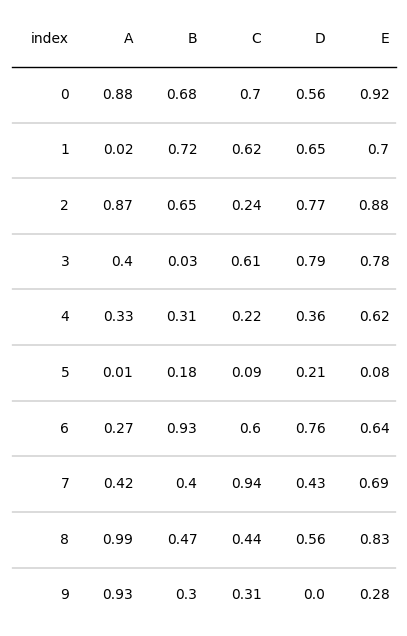

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from plottable import Table

d = pd.DataFrame(np.random.random((10, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(5, 8))
tab = Table(d)

plt.show()